### PCA 개요 

In [15]:
from sklearn.datasets import load_iris # 아이리스 붓꽃 데이터셋
import pandas as pd # 표 관리 판다스 패키지
import matplotlib.pyplot as plt # 시각화 패키지
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris() # 아이리스 클래스 호출

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
irisDF = pd.DataFrame(iris.data , columns=iris.feature_names)
irisDF['target']=iris.target # 타켓 피처를 새로 생성
irisDF.head(3) # 3행까지의 표

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [16]:
irisDF.shape # 종속변수를 제외하고 4개의 피처존재

(150, 5)

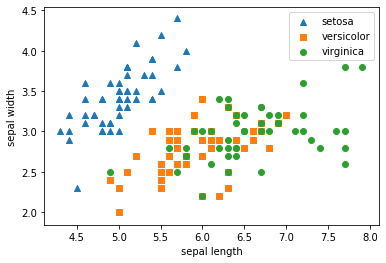

In [17]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal length (cm)'] # target=0,x축, target=1,x축, target=3,x축
    y_axis_data = irisDF[irisDF['target']==i]['sepal width (cm)'] # target=0,y축, target=2,y축,target=3,y축 
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i]) # 0,1,2에 따라 다른 표시 점 그래프

plt.legend() # 범주 위치 기본값
plt.xlabel('sepal length') # x축 이름
plt.ylabel('sepal width') # y축 이름
plt.show() # 그래프 표시

###### 정규화 
- 사이즈가 클 경우, 주성분으로 해석이 될 수 있기때문에 정규화 필요 ( StandardScaler 혹은 MinMaxScaler ) 

- PCA
    - 파라미터 
        - n_components : 
            - 실수 / 정수 
                - ex) 2 일 경우, 차우너 축소를 2번( Eigen-Vector를 2번 찾는 다는 것 ) 
            - 실수 : 0.9 일 경우... 뭐..?

In [18]:
from sklearn.preprocessing import StandardScaler # 정규화 기능 불러오기

iris_scaled = StandardScaler().fit_transform(irisDF) # 데이터 정규화 수행

In [19]:
from sklearn.decomposition import PCA # 사이킷런 PCA 차원축소 기능 불러오기

pca = PCA(n_components=2) # PCA 클래스 호출 및 변환될 차원의 수 2 --> 2개 피처

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled) # 변환 준비
iris_pca = pca.transform(iris_scaled) # 변환 수행
print(iris_pca.shape) # 변환된 구조 확인

(150, 2)


In [20]:
# PCA 치환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca후 feature_1','pca후 feature_2'] # 컬럼명
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns) #2번 차원축소된 데이터를 표로 변환하고 컬럼명지정
irisDF_pca['target']=iris.target # 종속변수 추가
irisDF_pca.head(3) # 표의 첫 3행까지 보여줌

,pca후 feature_1,pca후 feature_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


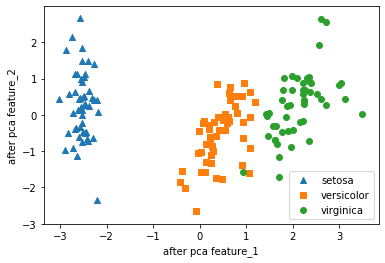

In [21]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o'] # 점 종류, 세모, 네모, 동그라미

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca후 feature_1'] #종속변수 클래스에 따른 x축에 첫번째 피처 지정
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca후 feature_2'] #종속변수 클래스에 따른 y축에 두번째 피처 지정
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i]) # 클래스별 점 그래프 표시

plt.legend() # 범주 기본 위치
plt.xlabel('after pca feature_1') # x축이름
plt.ylabel('after pca feature_2') # y축이름
plt.show()

In [22]:
print(pca.explained_variance_ratio_) # 전체 분산에서 개별 피처가 차지하는 변동성 비율
# 클수록 각 피쳐를 설명을 잘한다는 것 

##################################################################
# 만약에 여기서 하나의 feature가 큰 값을 가질 때 하나의 피쳐로 줄여도 되지 않을까??

# n_components = 3 -> 2 -> 1

[0.76740358 0.18282727]


### _______________

### 실습 0. PCA n_components를 3으로 지정해서 1과 2, 1과 3, 2와 3 번 컬럼을 비교하여 시각화해 봅니다. (15 minutes)

### __________

In [23]:
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 기능
from sklearn.model_selection import cross_val_score # 교차검증 기능 

rcf = RandomForestClassifier(random_state=156) # 랜덤포레스트 클래스 호출
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3) # 붓꽃데이터 교차검증수행
print(scores) # 각각의 정확도 확인

[0.98 0.94 0.96]


In [24]:
pca_X = irisDF_pca[['pca후 feature_1','pca후 feature_2']] # pca 후 컬럼명
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3) # pca 후 교차검증수행
print(scores_pca) # 교차검증별 정확도

[0.98 0.98 1.  ]


* credit card 데이터 세트 PCA 변환

In [26]:
import pandas as pd

df = pd.read_excel('default of credit card clients.xls', sheet_name='Data')
print(df.shape)
df.head(3)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [27]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [28]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

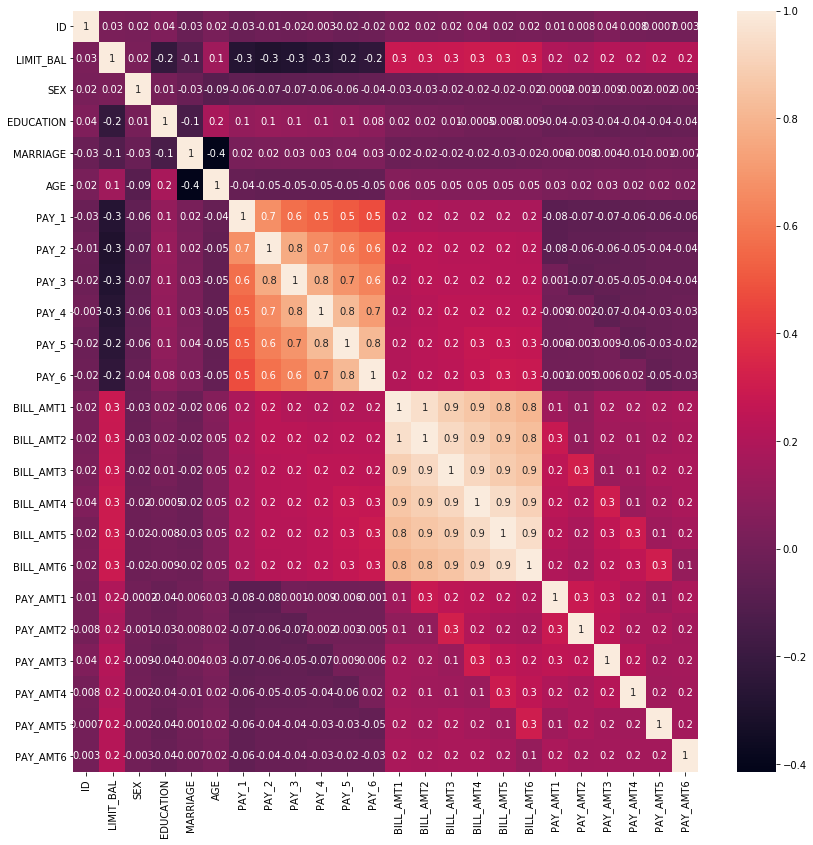

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

In [32]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 분류
from sklearn.model_selection import cross_val_score # 교차검증

rcf = RandomForestClassifier(n_estimators=300, random_state=156, n_jobs=-1) # 랜덤포레스트 호출
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3, n_jobs=-1) # 교차검증

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores))) # --> 검증 별 극심한 차이 발생

CV=3 인 경우의 개별 Fold세트별 정확도: [0.257  0.8209 0.784 ]
평균 정확도:0.6206


In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성 --> 상관관계가 매우 높은 피처로 서로 독립적이지 않음
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)] 
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler() # 피처스케일링 표준화 클래스 호출
df_cols_scaled = scaler.fit_transform(X_features[cols_bill]) # 해당 피처들의 표준화 및 따로 저장
pca = PCA(n_components=2) # PCA 클래스 호출, 6개 --> 2개로 차원 축소 예정
pca.fit(df_cols_scaled) # PCA 진행

print('PCA Component별 변동성:', pca.explained_variance_ratio_) #1번째 피처만으로도 6개 컬럼의 분산을 아주 잘 설명

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


#### 작은 실습: 위에서 n_components 5 --> 1로 바꾸면서 분산을 가장 잘 설명하는 피처를 보고 피처를 몇개로 줄여도 될지 확인합니다.

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler() # 피처 스케일링 표준화 클래스 호출
df_scaled = scaler.fit_transform(X_features) # 전체 독립변수들에 표준화 진행

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6) # PCA 클래스 호출, 총 6개의 피처로 압축 예정
df_pca = pca.fit_transform(df_scaled) # 24개 피처 PCA 진행으로 6개 피처로 차원축소 진행
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3, n_jobs=-1) # 교차 검증

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca) # 검증별 정확도
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca))) # 평균 정확도 --> 올라감

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7762 0.7977 0.8027]
PCA 변환 데이터 셋 평균 정확도:0.7922


In [35]:
print(df_scaled.shape) # PCA 전 데이터셋
print(df_pca.shape) # PCA 후 데이터셋 24 --> 6으로 차원 축소

(30000, 24)
(30000, 6)


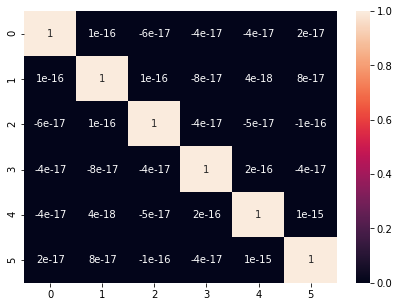

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = pd.DataFrame(df_pca).corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt='.1g') # 변수간 상관관계 거의 없음, 완전독립

### ___________________

### 실습 1. 카드 데이터의 피처들 중 상관관계가 매우 높은 피처들을 하나씩만 남기고 삭제하고 분석, 교차검증을 수행 후 PCA 로 차원축소한 결과와 비교합니다. (30 minutes)

### _________

### 실습 1. 와인 퀄리티 분석에 PCA를 적용하여 1 ~ 2 번의 차원 축소 후 정확도(분류) 혹은 RMSE(회귀)를 비교해 봅니다. (30 minutes)

### _____________